# Movie Analysis

1. Hvilket production companies har den største indtjening?
3. Er der sammenhæng i hvornår en film bliver udgivet på året i forhold til hvor stor indtjening filmen får?
4. Er der en sammenhæng mellem en films budget og dens revenue?
5. Er der en sammenhæng mellem user-rating og profit?

5. hvilke genre er den som flest film har?
6. Vis et bar plot med den gennemsnitlige rating for alle genre
7. Vis et bar plot med den gennemsnitlige revenue for alle genre
8. Hvilke production companies har lavet flest film

In [15]:
import modules.analyser.Analyser as an

#### Getting data
We are going to use data about movies. We load our datasets from our folder "data".

#### Preparing

In [16]:
data = an.prepare_data()
data.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies,profit
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]",343554033.0
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",197797249.0
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0,en,[{'name': 'Twentieth Century Fox Film Corporat...,65452156.0
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0,en,"[{'name': 'Regency Enterprises', 'id': 508}, {...",127436818.0
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0,en,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",29350171.0


#### Can we see a linear association between the budget and the revenue features?

We will now try to see if we can see a linear association between the budget and revenue features, to figure out if we can explain a relation between the two features

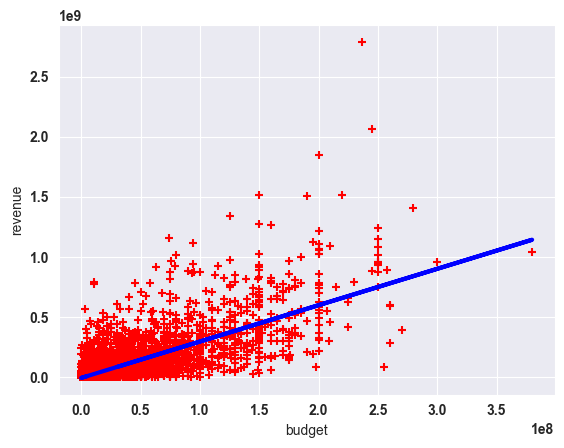

In [17]:
# shows linear regression plot
an.linear_regression_func(data,'budget','revenue')

In [18]:
# how strong is the linear relation between the budget and revenue?
an.correlator(data, 'budget','revenue')

Correlation between budget and revenue  is:  0.7299137384488268


C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


In [35]:
# predict the revenue and proft for a 3.000.000 dollar movie-budget
budget = 3000000
predict_revenue = an.revenue_predict(data,'budget','revenue', budget)
print("Predicted revenue: {}".format(round(predict_revenue, ndigits=2)))
profit = predict_revenue - budget
print("Predicted profit: {}".format(round(profit, ndigits=2)))

Predicted revenue: 5451651.53
Predicted profit: 2451651.53


#### Can we see a linear association between the popularity and the profit features?

We will now try to see if we can see a linear association between the popularity and profit features, to figure out if we can explain a relation between the two features.

Are you sure you will get a high profit for a movie with a high user-rating?

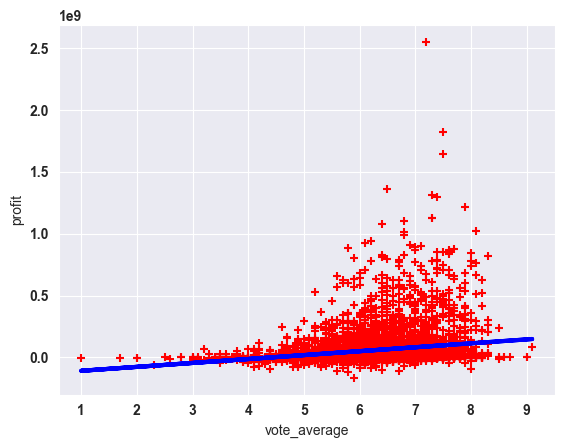

In [37]:
# shows linear regression plot
an.linear_regression_func(data,'vote_average','profit')

In [41]:
# how strong is the linear relation between the vote average and revenue?
an.correlator(data,'vote_average','profit')

Correlation between vote_average and profit  is:  0.2032246805790672
0        343554033.0
1        197797249.0
3         65452156.0
5        127436818.0
8         29350171.0
            ...     
45167    173770205.0
45250      7000000.0
45409       528612.0
45412      -731207.0
45422     -3587000.0
Name: profit, Length: 5353, dtype: float64


C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


#### Average revenue by month

C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:52: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])


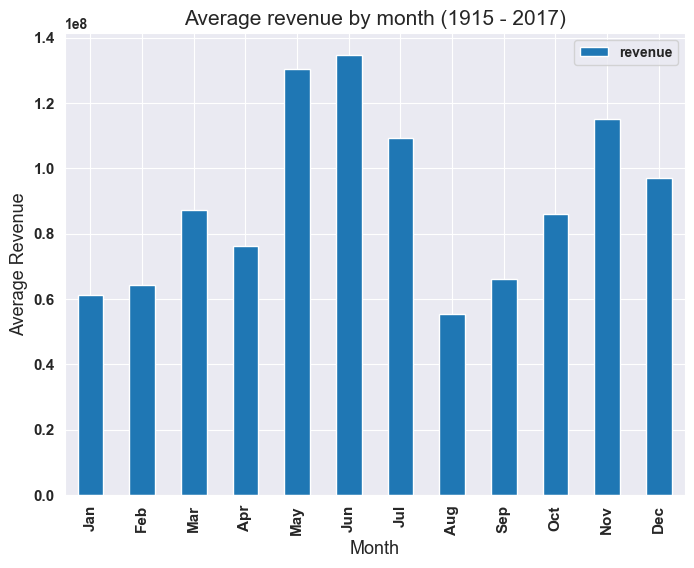

In [21]:
an.average_revenue_by_month(data)

#### Heatmap
Which features is

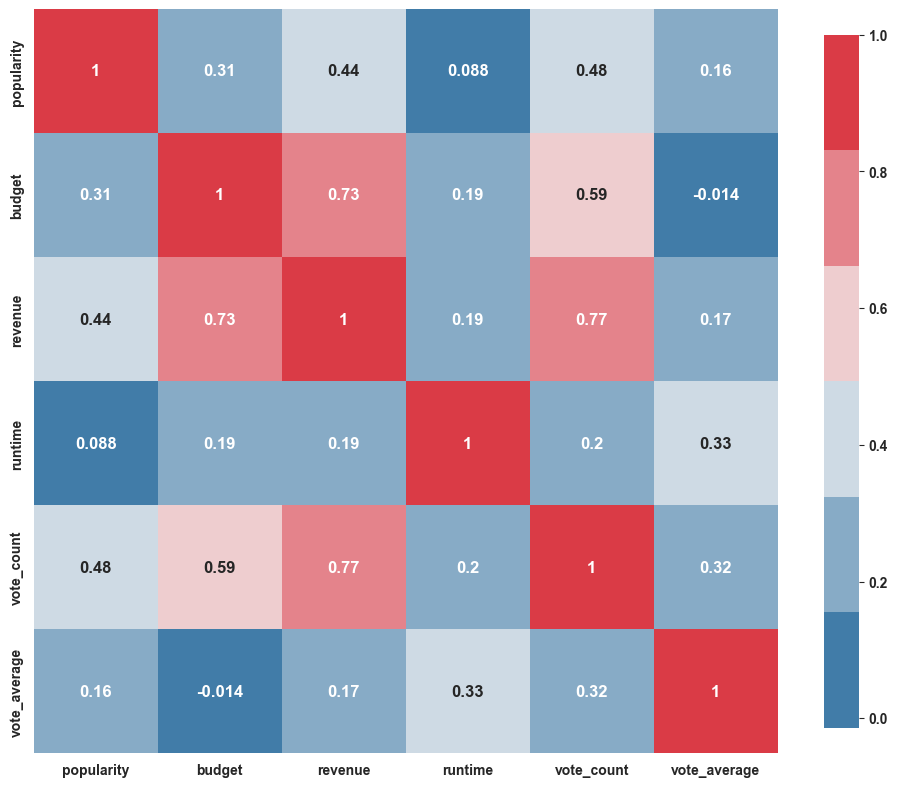

In [22]:
an.plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

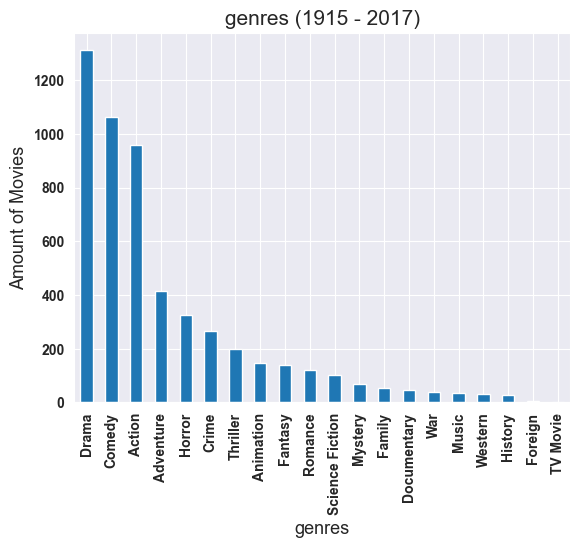

In [23]:
an.plot_genre(data,'genres')

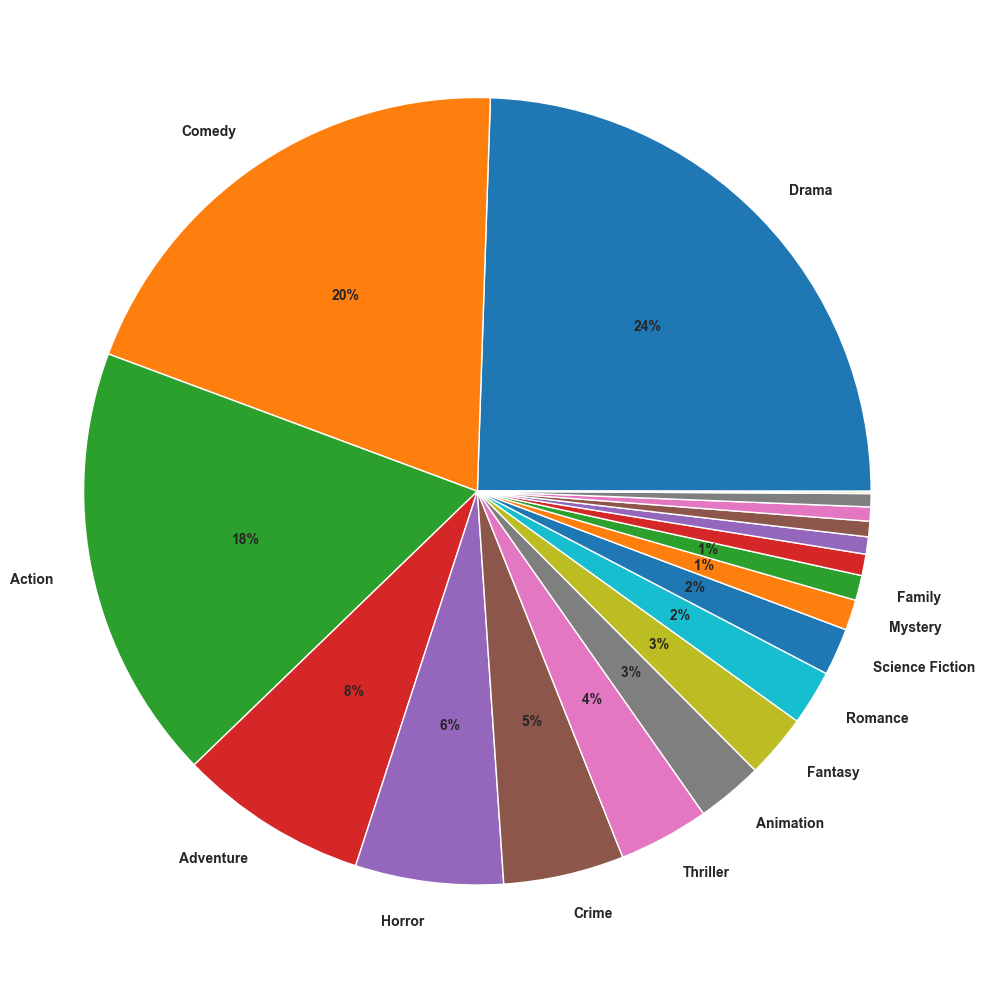

In [24]:
an.plot_genre_pie(data, 'genres')

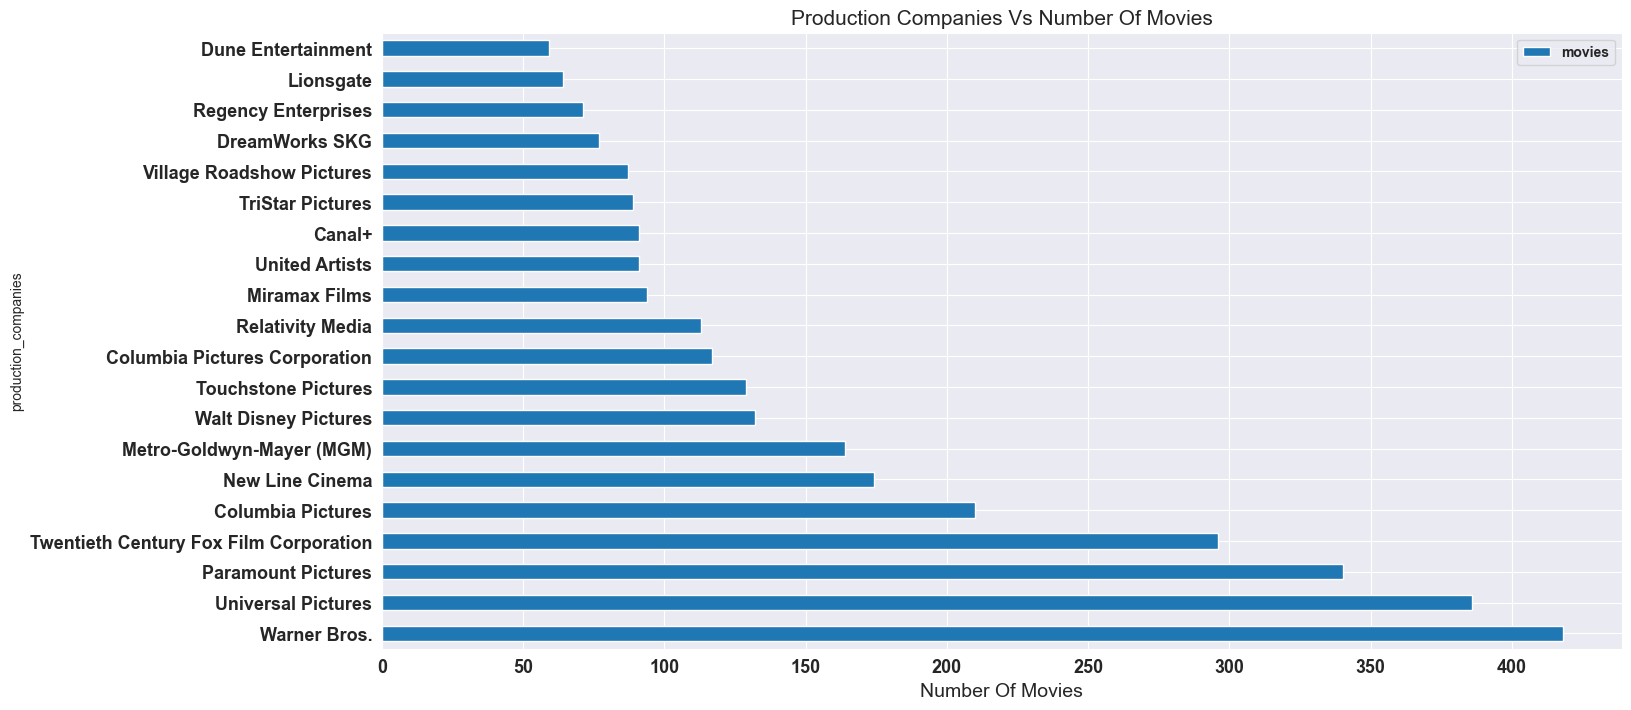

In [25]:
an.plot_production_company(data)

,revenue
genres,
Animation,2.408561e+08
Family,2.406010e+08
Adventure,1.987482e+08
Science Fiction,1.665982e+08
Fantasy,1.327448e+08
Action,1.234665e+08
Thriller,7.473545e+07
Romance,7.012801e+07
History,6.766593e+07


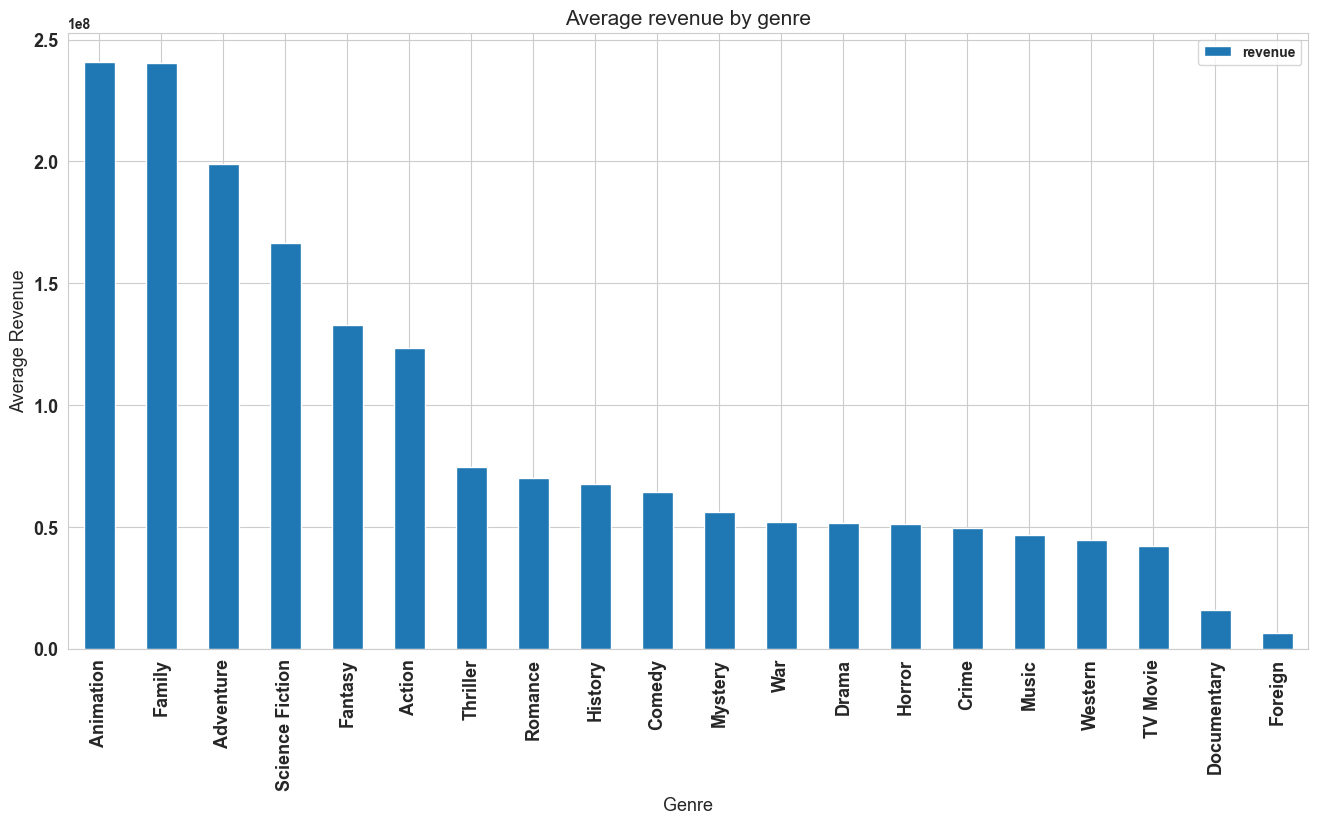

In [26]:
an.plot_average_revenue_by_genre(data)
an.average_revenue_by_genre(data)

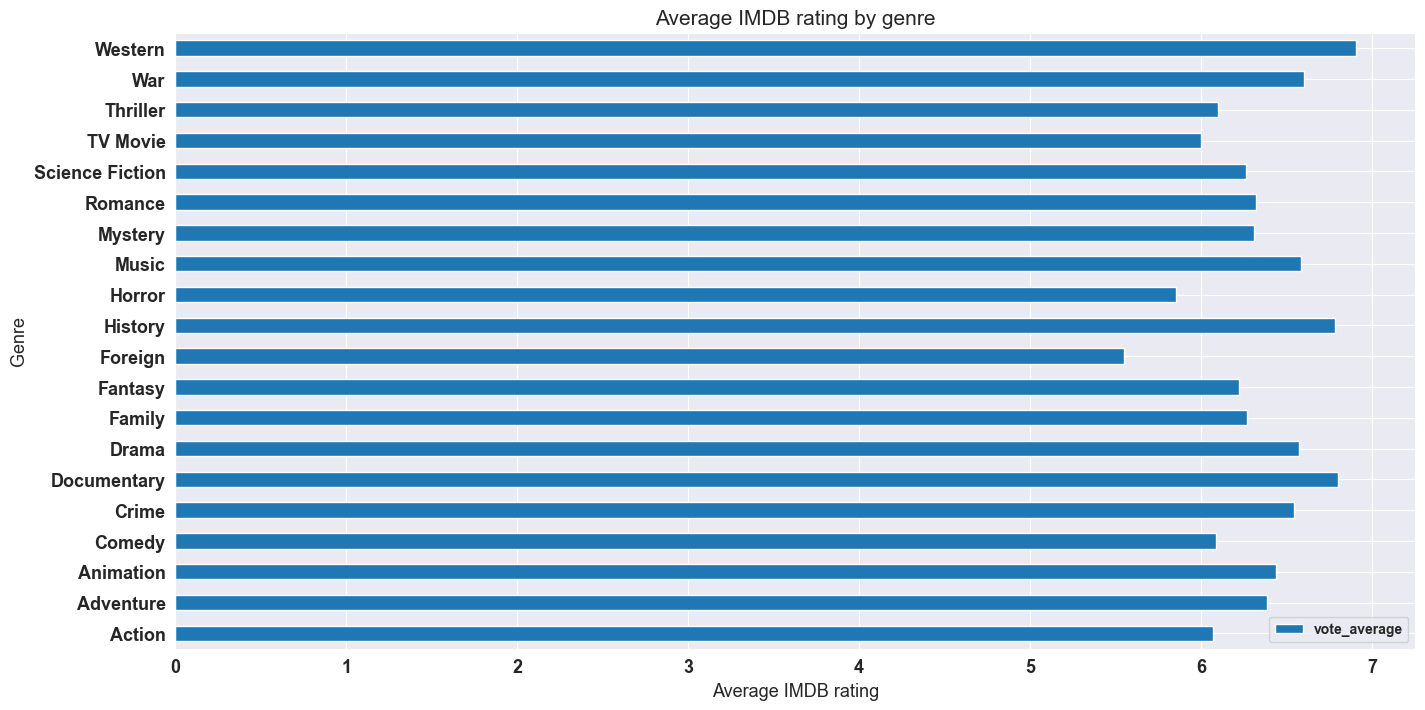

In [27]:
an.plot_average_ratings_by_genre(data)

In [28]:
datatest = pd.read_csv("data/movies_metadata.csv")
datatest = datatest[
        ['budget', 'genres', 'id', 'imdb_id', 'original_title', 'popularity', 'release_date', 'revenue', 'runtime',
         'vote_average', 'vote_count', 'original_language', 'production_companies']]
datatest = datatest[(datatest['genres'] != "[]")]
datatest['genres'] = datatest['genres'].fillna('[]').apply(literal_eval).apply(
        lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
datatest = datatest[(datatest['production_companies'] != "[]")]
datatest['production_companies'] = datatest['production_companies'].fillna('[]').apply(literal_eval).apply(
        lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
datatest.dropna(inplace=True)
datatest = datatest[(datatest.T != 0).all()]
datatest['profit'] = datatest['revenue'] - datatest['budget']
datatest

NameError: name 'pd' is not defined

In [ ]:

prod = datatest['production_companies'].str[0]
prod


In [ ]:
an.plot_average_revenue_by_prod(datatest)